### Day 14: Restroom Redoubt

https://adventofcode.com/2024/day/14

In [1]:
from pathlib import Path
import sys
import re

sys.path.append("..")

from tools import get_input

pattern = re.compile(r"p=(-?\d+),(-?\d+)\s+v=(-?\d+),(-?\d+)")

tst = [tuple(int(g) for g in pattern.match(line).groups()) for line in (Path().parent / "test.txt").read_text(encoding="utf-8").splitlines()]
inp = [tuple(int(g) for g in pattern.match(line).groups()) for line in get_input(14).splitlines()]

In [2]:
from math import prod

def solution_1(data: list[tuple[int, int, int, int]], x:int, y:int) -> int:
    m = [([p[0], p[1]], (p[2], p[3])) for p in data]
    for _ in range(100):
        for i, (p, v) in enumerate(m):
            m[i] = ([(p[0] + v[0]) % x, (p[1] + v[1]) % y], v)
    res = [0] * 4
    for (a, b), _ in m:
        if a < x // 2:
            if b < y // 2:
                res[0] += 1
            elif b > y // 2:
                res[2] += 1
        elif a > x // 2:
            if b < y // 2:
                res[1] += 1
            elif b > y // 2:
                res[3] += 1
    return prod(res)

assert solution_1(tst, 11, 7) == 12
solution_1(inp, 101, 103)  # 218619324

218619324

In [3]:
from matplotlib import pyplot as plt

m = [([p[0], p[1]], (p[2], p[3])) for p in inp]
secs = 0

for _ in range(6500):
    plt.clf()
    for i, (p, v) in enumerate(m):
        m[i] = ([(p[0] + v[0]) % 101, (p[1] + v[1]) % 103], v)
    plt.scatter([p[0] for p, _ in m], [-p[1] for p, _ in m])
    secs += 1   
    plt.title(f"Seconds: {secs}")
    plt.savefig(f"frames/{secs:04d}.png")

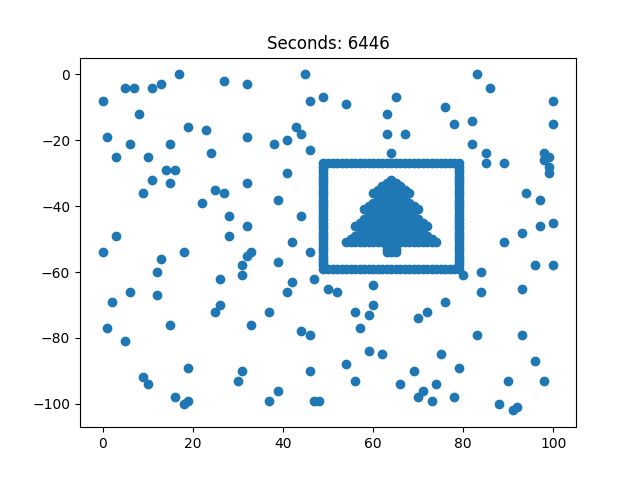

In [4]:
from IPython.display import Image, display
display(Image("frames/6446.png"))